In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('laptopData.csv')

In [4]:
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df1 = df.copy()

In [6]:
df1.columns = df1.columns.str.lower()

In [7]:
df1.rename(columns = {
    'inches' : 'screen_size',
    'screenresolution' : 'screen_resolution',
    'cpu' : 'processor',
    'opsys': 'os'
}, inplace = True)

In [8]:
df1.columns

Index(['company', 'typename', 'screen_size', 'screen_resolution', 'processor',
       'ram', 'memory', 'gpu', 'os', 'weight', 'price'],
      dtype='object')

# Dataset Summary:
---
---
- Column info:
    - `company`: contains information about the company name of laptop.
    - `typename`: contains information about the type of laptop.
    - `screen_size`: contains information about the display size in inches.
    - `screen_resolution`: contains information about screen resolution and other display related info.
    - `processor`: contains information about the processor used in the laptop.
    - `ram`: ram size used in the laptop.
    - `memory` : ssd/hdd information.
    - `gpu` : graphics card related information.
    - `os` : operating system used.
    - `weight`: weight of laptop in kg.
    - `price`: price of laptop.
        

# Data Assessing
- Both manual and programatic.
---

- Table - df1

### Dirty Data (Data Quality)
---
- `company`: column contains some null values. * <i><u>Issue : Completeness</u></i>
- `typename`: column contains null values. * <i><u>Issue : Completeness</u></i>
- `screen_size`:
  - column contains null values. * <i><u>Issue : Completeness</u></i>
  - ? is present at some values. * <i><u>Issue : Validity</u></i>
- `screen_resolution`: null values. * <i><u>Issue : Completeness</u></i>
- `processor`:
  - column contains null values. * <i><u>Issue : Completeness</u></i>
- `ram`: null values and data type is string. * <i><u>Issue : Completeness and Accuracy</u></i>
- `memory` :
  - null values * <i><u>Issue : Completeness</u></i>
  - some values have string attached to it - flash storage - which represents ssd kind of storage. * <i><u>Issue : Consistency</u></i>
- `gpu`: null values * <i><u>Issue : Completeness</u></i>
- `os`:
  - null values * <i><u>Issue : Completeness</u></i>
  - some models have android as os - (its valid) * 
  - some models dont come with preinstalled os.
  - consistency issue in names of os used. 
- `weight` :
  - remove the kg string. * <i><u>Issue : Accuracy </u></i>
  - convert to numeric form. * <i><u>Issue: Accuracy</u></i>
  - some values have values - 4,6,11 kg. some values have very low weight * <i><u>Issue : Accuracy</u></i>
  - some values have ? * <i><u>Issue : Validity</u></i>

### Untidy Data (Structural Problem)
---
- `scrren_resolution` : more column can be made from this column
- `cpu` : more columns can be made from this column.
- `memory`: some columns have both the values for ssd and hdd. - split into two columns.
- `gpu`: name can be extracted separately


In [9]:
df1.shape

(1303, 11)

In [10]:
df1.head()

,company,typename,screen_size,screen_resolution,processor,ram,memory,gpu,os,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df1.isnull().sum()

company              30
typename             30
screen_size          30
screen_resolution    30
processor            30
ram                  30
memory               30
gpu                  30
os                   30
weight               30
price                30
dtype: int64

In [12]:
index_to_drop = df1[df1['company'].isnull()].index

In [13]:
df1.drop(index = index_to_drop, inplace = True)

In [14]:
df1.isnull().sum()

company              0
typename             0
screen_size          0
screen_resolution    0
processor            0
ram                  0
memory               0
gpu                  0
os                   0
weight               0
price                0
dtype: int64

In [15]:
df1.duplicated().sum()

29

In [16]:
df1[df1.duplicated()]

,company,typename,screen_size,screen_resolution,processor,ram,memory,gpu,os,weight,price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [17]:
# removing the duplicated values.

In [18]:
df1 = df1.drop_duplicates(keep = 'first')

In [19]:
df1['company'].value_counts()

company
Lenovo       282
Dell         281
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [20]:
df1['typename'].value_counts()

typename
Notebook              689
Gaming                203
Ultrabook             189
2 in 1 Convertible    112
Workstation            29
Netbook                22
Name: count, dtype: int64

In [21]:
df1['screen_size'].value_counts() # some values have ? in them.

screen_size
15.6    621
14      188
17.3    162
13.3    157
12.5     38
11.6     29
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [22]:
df1['screen_resolution'].value_counts()

screen_resolution
Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 288

In [23]:
df1['processor'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [24]:
df1['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [25]:
df1['memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [26]:
df1['gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [27]:
df1['os'].value_counts() # this column has consistency issue and can be transformed for simplicity.

os
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [28]:
df1['weight'].value_counts()  # some contains - ? and some are as heavy as 11 kg.

weight
2.2kg     106
2.1kg      57
2.4kg      41
2.5kg      37
2.3kg      37
         ... 
1.41kg      1
3.6kg       1
4.7kg       1
4.33kg      1
4.0kg       1
Name: count, Length: 189, dtype: int64

In [29]:
df1[df1['weight'].str.strip('kg') == '?']

,company,typename,screen_size,screen_resolution,processor,ram,memory,gpu,os,weight,price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [30]:
df1.loc[208,'weight'] = np.NaN

In [31]:
df1['weight'] = df1['weight'].str.strip('kg').astype(float)

In [32]:
temp_df = df1[df1['weight'] > 3]

In [33]:
# if laptop is of gaming laptop or workstation laptop they are upto 4 kg not more than that - so these values are invalid.
# these unreasonable values are with the notebooks and ultrabook - so replacing with null for weight > 3.5 kg.

In [34]:
temp_df = temp_df[temp_df['typename'].isin(['Notebook','Ultrabook'])]

In [35]:
index_to_swap = temp_df[temp_df['weight'] > 3.5]['weight'].index

In [36]:
df1.loc[index_to_swap,'weight'] = np.NaN

<Axes: ylabel='weight'>

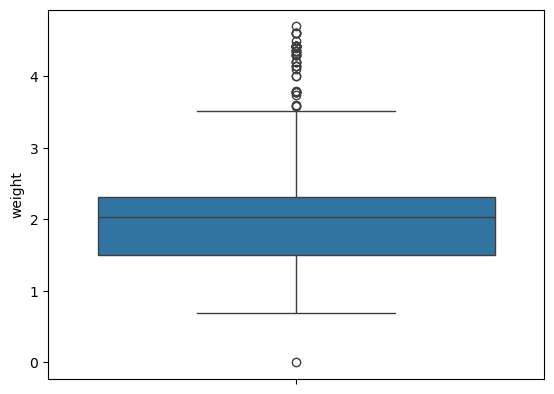

In [37]:
sns.boxplot( data = df1, y = 'weight')  # not outliers as most of them are gaming laptops

In [38]:
df1[df1['weight'] > 3.5].head()

,company,typename,screen_size,screen_resolution,processor,ram,memory,gpu,os,weight,price
177,MSI,Gaming,18.4,Full HD 1920x1080,Intel Core i7 6920HQ 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.40,149130.7200
224,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,130873.7952
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,207259.2000
247,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.60,159786.7200
251,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,95850.7200


<Axes: xlabel='typename', ylabel='count'>

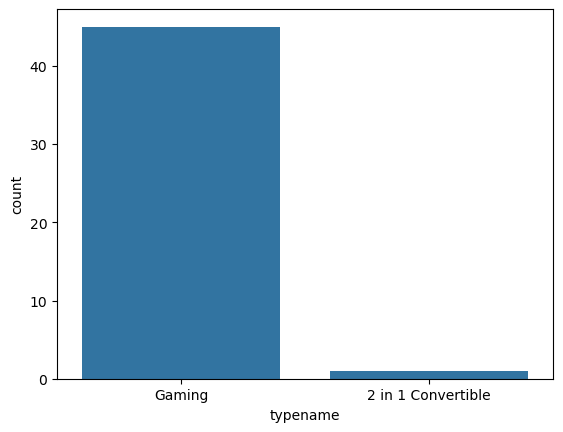

In [39]:
sns.countplot(data = df1[df1['weight'] > 3.5] , x = 'typename')

In [40]:
df1[(df1['typename'] == '2 in 1 Convertible') & (df1['weight'] > 3.5)] # invalid.

,company,typename,screen_size,screen_resolution,processor,ram,memory,gpu,os,weight,price
266,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD + 512GB SSD,Intel UHD Graphics 620,Windows 10,4.1,79866.72


In [41]:
df1.loc[266,'weight'] = np.NaN

In [42]:
df1[df1['weight'] < 1]

,company,typename,screen_size,screen_resolution,processor,ram,memory,gpu,os,weight,price
14,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,macOS,0.9200,67260.6720
81,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,macOS,0.9200,80452.8000
146,HP,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,0.9700,107305.9200
349,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,AMD Radeon 530,Windows 10,0.0002,35324.6400
489,Asus,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.9100,103896.0000
746,Samsung,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.8100,87858.7200
794,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.9200,62071.2000
812,Samsung,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.8100,79866.7200
909,LG,Ultrabook,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.9800,101178.7200
990,HP,Netbook,12.5,Full HD 1920x1080,Intel Core M 6Y75 1.2GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,0.9700,101658.2400


In [43]:
df1[df1['weight'] < 0.9] # samsung galaxy book pro has weight aroun 862g so possible for ultrabook.
wt_index = df1[df1['weight'] < 0.8].index

In [44]:
df1.loc[wt_index, 'weight'] = np.NaN

In [45]:
df1['price'] = df1['price'].round(2)

In [46]:
df1['weight'] = df1['weight'].round(2)

,company,typename,screen_size,screen_resolution,processor,ram,memory,gpu,os,weight,price
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.7,207259.20
577,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.6,141884.64
1048,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.6,122010.67
1081,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32GB,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.6,172627.20
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.6,146519.47


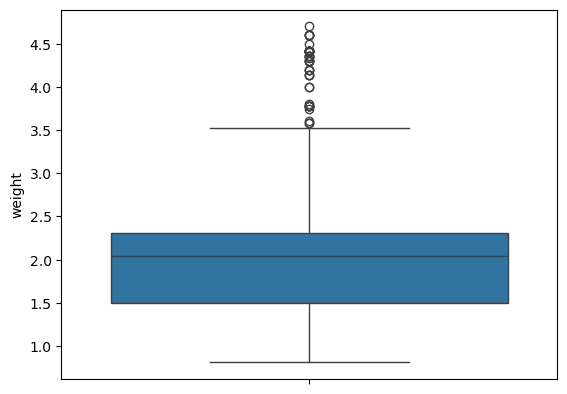

In [47]:
sns.boxplot(data = df1, y = 'weight')
df1[df1['weight'] > 4.5]                # they are valid as gaming laptop with 17 inch screen size.

In [48]:
df1.isnull().sum()

company               0
typename              0
screen_size           0
screen_resolution     0
processor             0
ram                   0
memory                0
gpu                   0
os                    0
weight               15
price                 0
dtype: int64

In [49]:
df1.loc[df1['screen_size'] == '?','screen_size'] = np.NaN

In [50]:
df1['screen_size'] = df1['screen_size'].astype(float)

In [51]:
df1['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [52]:
df1['ram'] = df1['ram'].str.strip('GB').astype(int)

scrren_resolution : more column can be made from this column
cpu : more columns can be made from this column.
memory: some columns have both the values for ssd and hdd. - split into two columns.
gpu: name can be extracted separately

In [53]:
# untidy data cleaning.

In [54]:
import re
temp_df = df1['screen_resolution'].str.extract(r'(\d{3,4})x(\d{3,4})')
temp_df.columns = ['px_h', 'px_v']

In [55]:
df1 = pd.merge(df1, temp_df, on = df1.index)

In [56]:
df1.drop(columns = 'key_0', inplace = True)

In [57]:
df1['screen_info'] = df1['screen_resolution'].str.extract(r'(.*?)(?=\s*\d{3,4}x\d{3,4})')

In [58]:
df1['screen_info'].isnull().sum() # but some '' are present where there was no info.

0

In [59]:
df1 = df1.drop(columns = 'screen_resolution')

In [60]:
df1['processor_brand'] = df1['processor'].str.split(' ').str.get(0)

In [61]:
processor_freq = df1['processor'].str.extract(r'(\d+\.\d+GHz|\d+GHz)$')

In [62]:
df1 = pd.merge(df1, processor_freq, on = df1.index)
df1.drop(columns = 'key_0', inplace = True)

In [63]:
df1.rename(columns = {
    0 : 'processor_freq'
},inplace = True)

In [64]:
processor_temp = df1['processor'].str.split(' ', n = 1).apply(pd.Series)

In [65]:
processor_details = processor_temp[1].str.extract(r'^(.*?)(?=\s*\d+(\.\d+)?GHz)')[0]

In [66]:
df1 = pd.merge(df1,processor_details , on = df1.index)

In [67]:
df1.rename(columns = {
    0 : 'processor_details'
}, inplace = True)

In [68]:
df1['processor_brand'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [69]:
df1['processor_freq'] = df1['processor_freq'].str.strip('GHz').astype(float)

In [70]:
df1['processor_details'].value_counts()

processor_details
Core i5 7200U       186
Core i7 7700HQ      143
Core i7 7500U       127
Core i3 6006U        79
Core i7 8550U        72
                   ... 
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
Atom Z8350            1
A9-Series 9410        1
Name: count, Length: 93, dtype: int64

In [71]:
df1.drop(columns = 'processor', inplace = True)

In [72]:
df1['gpu_brand'] = df1['gpu'].str.split().str.get(0)

In [73]:
df1['os'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [74]:
df1['os_used'] = df1['os'].replace({
    'macOS': 'mac_os',
    'No OS' : 'no_preinstalled_os',
    'Windows 10': 'windows',
    'Mac OS X': 'mac_os',
    'Linux': 'linux',
    'Windows 10 S': 'windows',
    'Chrome OS' : 'chrome_os',
    'Windows 7': 'windows',
    'Android': 'android'   
})

In [75]:
df1.drop(columns = 'os', inplace = True)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key_0              1244 non-null   int64  
 1   company            1244 non-null   object 
 2   typename           1244 non-null   object 
 3   screen_size        1243 non-null   float64
 4   ram                1244 non-null   int32  
 5   memory             1244 non-null   object 
 6   gpu                1244 non-null   object 
 7   weight             1229 non-null   float64
 8   price              1244 non-null   float64
 9   px_h               1244 non-null   object 
 10  px_v               1244 non-null   object 
 11  screen_info        1244 non-null   object 
 12  processor_brand    1244 non-null   object 
 13  processor_freq     1244 non-null   float64
 14  processor_details  1244 non-null   object 
 15  gpu_brand          1244 non-null   object 
 16  os_used            1244 

In [77]:
memory_temp = df1['memory'].str.split('+').apply(pd.Series)

In [78]:
memory_temp.columns = ['ssd_capacity','hdd_capacity']

In [79]:
memory_temp['ssd_capacity'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD', '128GB SSD ',
       '256GB SSD ', '64GB Flash Storage', '32GB Flash Storage',
       '32GB SSD', '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD ',
       '1TB SSD', '16GB SSD', '16GB Flash Storage', '64GB Flash Storage ',
       '180GB SSD', '1TB HDD ', '32GB HDD', '1TB SSD ', '?',
       '512GB Flash Storage', '128GB HDD', '240GB SSD', '8GB SSD',
       '508GB Hybrid', '1.0TB HDD'], dtype=object)

In [80]:
# this flash storage in case of apple device referes to the ssd only
# but for the non apple devices the flash storage is not ssd - and this storage is usually provided in the lower price devices.

# need to create another column flash storage for other lower priced devices.

In [81]:
memory_temp['hdd_capacity'].unique()

array([nan, '  1TB HDD', '  256GB SSD', '  2TB HDD', '  500GB HDD',
       '  512GB SSD', '  1.0TB Hybrid'], dtype=object)

In [82]:
# this hdd_capacity column doesnt has the flash storage problem.

In [83]:
flash_stg_not_apple = df1[(memory_temp['ssd_capacity'].str.contains('flash', case = False)) & (df1['company'] != 'Apple')].index

In [84]:
df1.loc[flash_stg_not_apple]

,key_0,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,screen_info,processor_brand,processor_freq,processor_details,gpu_brand,os_used
29,29,Chuwi,Notebook,15.6,4,64GB Flash Storage,Intel HD Graphics,1.89,13053.07,1920,1080,Full HD,Intel,1.44,Atom x5-Z8300,Intel,windows
30,30,Asus,Notebook,14.0,2,32GB Flash Storage,AMD Radeon R2,1.65,10602.72,1366,768,,AMD,1.50,E-Series E2-6110,AMD,windows
34,34,Lenovo,Notebook,14.0,4,64GB Flash Storage,Intel HD Graphics 500,1.44,13266.72,1366,768,,Intel,1.10,Celeron Dual Core N3350,Intel,windows
184,184,Vero,Notebook,14.0,4,32GB Flash Storage,Intel HD Graphics 500,1.30,13852.80,1920,1080,IPS Panel Full HD,Intel,1.10,Celeron Dual Core N3350,Intel,windows
305,305,Asus,2 in 1 Convertible,11.6,2,32GB Flash Storage,Intel HD Graphics 500,1.10,14652.00,1366,768,Touchscreen,Intel,1.10,Celeron Dual Core N3350,Intel,windows
308,308,Lenovo,Notebook,13.3,4,16GB Flash Storage,Intel HD Graphics 510,1.45,24503.47,1366,768,,Intel,1.60,Celeron Dual Core 3855U,Intel,chrome_os
310,310,Acer,Notebook,11.6,4,128GB Flash Storage,Intel HD Graphics 405,1.40,25840.80,1366,768,,Intel,1.60,Pentium Quad Core N3710,Intel,windows
316,316,Lenovo,Notebook,14.0,4,32GB Flash Storage,Intel HD Graphics 500,1.44,15557.76,1366,768,,Intel,1.10,Celeron Dual Core N3350,Intel,windows
336,336,HP,Notebook,14.0,2,32GB Flash Storage,Intel HD Graphics 400,1.44,14865.12,1366,768,,Intel,1.60,Celeron Dual Core N3060,Intel,windows
338,338,Asus,2 in 1 Convertible,11.6,4,32GB Flash Storage,Intel HD Graphics 500,1.50,19980.00,1366,768,Touchscreen,Intel,1.10,Celeron Dual Core N3350,Intel,windows


In [85]:
memory_temp.loc[flash_stg_not_apple,'flash_not_storage'] = memory_temp.loc[flash_stg_not_apple,'ssd_capacity']

In [86]:
memory_temp.loc[flash_stg_not_apple,'ssd_capacity'] = np.NaN

In [87]:
memory_temp.loc[flash_stg_not_apple]

,ssd_capacity,hdd_capacity,flash_not_storage
29,NaN,NaN,64GB Flash Storage
30,NaN,NaN,32GB Flash Storage
34,NaN,NaN,64GB Flash Storage
184,NaN,NaN,32GB Flash Storage
305,NaN,NaN,32GB Flash Storage
308,NaN,NaN,16GB Flash Storage
310,NaN,NaN,128GB Flash Storage
316,NaN,NaN,32GB Flash Storage
336,NaN,NaN,32GB Flash Storage
338,NaN,NaN,32GB Flash Storage


In [88]:
df1.loc[[881, 802]]
# these two's flash storage also means the - ssd storage.

,key_0,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,screen_info,processor_brand,processor_freq,processor_details,gpu_brand,os_used
881,881,Lenovo,Ultrabook,14.0,8,256GB Flash Storage,Intel HD Graphics 620,1.13,109170.72,1920,1080,IPS Panel Full HD,Intel,2.7,Core i7 7500U,Intel,windows
802,802,Lenovo,Ultrabook,14.0,8,256GB Flash Storage,Intel HD Graphics 620,1.13,99900.00,1920,1080,IPS Panel Full HD,Intel,2.5,Core i5 7200U,Intel,windows


In [89]:
memory_temp

,ssd_capacity,hdd_capacity,flash_not_storage
0,128GB SSD,NaN,NaN
1,128GB Flash Storage,NaN,NaN
2,256GB SSD,NaN,NaN
3,512GB SSD,NaN,NaN
4,256GB SSD,NaN,NaN
...,...,...,...
1239,500GB HDD,NaN,NaN
1240,128GB SSD,NaN,NaN
1241,512GB SSD,NaN,NaN
1242,NaN,NaN,64GB Flash Storage


In [90]:
memory_temp['hdd_capacity'].unique()

array([nan, '  1TB HDD', '  256GB SSD', '  2TB HDD', '  500GB HDD',
       '  512GB SSD', '  1.0TB Hybrid'], dtype=object)

In [91]:
memory_temp[memory_temp['hdd_capacity'].str.contains('ssd', case = False) == True]

,ssd_capacity,hdd_capacity,flash_not_storage
27,256GB SSD,256GB SSD,NaN
258,512GB SSD,512GB SSD,NaN
337,512GB SSD,256GB SSD,NaN
879,256GB SSD,256GB SSD,NaN


In [92]:
# now the index - 27,258,337,879
memory_temp.loc[[27,258,337,879]]

,ssd_capacity,hdd_capacity,flash_not_storage
27,256GB SSD,256GB SSD,NaN
258,512GB SSD,512GB SSD,NaN
337,512GB SSD,256GB SSD,NaN
879,256GB SSD,256GB SSD,NaN


In [93]:
# now simply add the ssd capacity for both.
memory_temp['ssd_capacity'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD', '128GB SSD ',
       '256GB SSD ', nan, '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD ', '1TB SSD', '16GB SSD', '180GB SSD',
       '1TB HDD ', '32GB HDD', '1TB SSD ', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD'],
      dtype=object)

In [94]:
memory_temp[(memory_temp['ssd_capacity'].str.contains('hdd', case = False) == True) & (memory_temp['hdd_capacity'].str.contains('hdd', case = False) == True)]

,ssd_capacity,hdd_capacity,flash_not_storage
685,1TB HDD,1TB HDD,NaN


In [95]:
# this 685 index also has the problem. double hdd

In [96]:
# solution to the problems:

# - creat new columns naming - ssd_count and hdd_count.
# - fix but add the capacities first.
# - and create a total_storage_available column in gb.
# - but first fix the invalid values in other indices except these double ssd and hdd values.

In [97]:
dont_touch_index = set([27,258,337,879,685])

In [98]:
a = set(memory_temp.index.values)
index_to_touch = list(a - dont_touch_index)


In [99]:
# first shifting the hdd values.
memory_temp_two = memory_temp.loc[index_to_touch]

In [100]:
memory_temp_two.loc[memory_temp_two['ssd_capacity'].str.contains('hdd', case = False) == True , :] = memory_temp_two[memory_temp_two['ssd_capacity'].str.contains('hdd', case = False) == True].shift(1, axis = 1)

In [101]:
memory_temp_two[memory_temp_two['ssd_capacity'].str.contains('hdd', case = False) == True] # solved.

,ssd_capacity,hdd_capacity,flash_not_storage


In [102]:
memory_temp.loc[memory_temp_two.index,:] = memory_temp_two.loc[memory_temp_two.index,:]

In [103]:
memory_temp[memory_temp['ssd_capacity'].str.contains('hdd', case = False) == True]

,ssd_capacity,hdd_capacity,flash_not_storage
685,1TB HDD,1TB HDD,NaN


In [104]:
memory_temp['ssd_count'] = 1 # intialising the column will fix for nan later after cleaning the column.
memory_temp['hdd_count'] = 1 # initialisng the column will fix for nan later after cleaning the column.

In [105]:
# for index 27,258,337,879- we have two ssd
# for index 685 - we have two hdd

In [106]:
memory_temp.loc[[27,258,337,879,685]]

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
27,256GB SSD,256GB SSD,NaN,1,1
258,512GB SSD,512GB SSD,NaN,1,1
337,512GB SSD,256GB SSD,NaN,1,1
879,256GB SSD,256GB SSD,NaN,1,1
685,1TB HDD,1TB HDD,NaN,1,1


In [107]:
memory_temp.loc[[27,258,337,879],'ssd_count'] = 2
memory_temp.loc[685,'hdd_count'] = 1

In [108]:
memory_temp.loc[[27,258,337,879,685]]

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
27,256GB SSD,256GB SSD,NaN,2,1
258,512GB SSD,512GB SSD,NaN,2,1
337,512GB SSD,256GB SSD,NaN,2,1
879,256GB SSD,256GB SSD,NaN,2,1
685,1TB HDD,1TB HDD,NaN,1,1


In [109]:
# cleaning and formatting the tb values to gb properly.

In [110]:
memory_temp['ssd_capacity'] = memory_temp['ssd_capacity'].str.split(' ', n = 1).str.get(0)

In [111]:
memory_temp['ssd_capacity'].unique()

array(['128GB', '256GB', '512GB', None, nan, '32GB', '64GB', '1.0TB',
       '1TB', '16GB', '180GB', '?', '240GB', '8GB', '508GB'], dtype=object)

In [112]:
memory_temp[memory_temp['ssd_capacity'] == '?']

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
749,?,NaN,NaN,1,1


In [113]:
memory_temp.loc[749,'ssd_capacity'] = np.NaN

In [114]:
memory_temp['ssd_capacity'].unique()

array(['128GB', '256GB', '512GB', None, nan, '32GB', '64GB', '1.0TB',
       '1TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [115]:
memory_temp.loc[[27,258,337,879,685]]  # we also need to remove the duplicate.
memory_temp.loc[[27,258,337,879],'hdd_capacity'] = np.NaN
memory_temp.loc[685,'ssd_capacity'] = np.NaN

In [116]:
memory_temp.loc[[27,258,337,879,685]] 

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
27,256GB,NaN,NaN,2,1
258,512GB,NaN,NaN,2,1
337,512GB,NaN,NaN,2,1
879,256GB,NaN,NaN,2,1
685,NaN,1TB HDD,NaN,1,1


In [117]:
# now formatting

In [118]:
ssd_in_tb = memory_temp[memory_temp['ssd_capacity'].str.contains('tb', case = False) == True].index

In [119]:
memory_temp.loc[ssd_in_tb, 'ssd_capacity'] = memory_temp.loc[ssd_in_tb]['ssd_capacity'].str.strip('TB').astype(float) 

In [120]:
memory_temp.loc[ssd_in_tb, 'ssd_capacity'] = memory_temp.loc[ssd_in_tb]['ssd_capacity'] * 1024

In [121]:
# ALL ABOVE CELLS ARE FRESHLY RUNNED.

In [122]:
memory_temp.loc[ssd_in_tb]

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
145,1024.0,NaN,NaN,1,1
189,1024.0,NaN,NaN,1,1
302,1024.0,NaN,NaN,1,1
307,1024.0,NaN,NaN,1,1
320,1024.0,NaN,NaN,1,1
388,1024.0,NaN,NaN,1,1
485,1024.0,NaN,NaN,1,1
597,1024.0,NaN,NaN,1,1
623,1024.0,NaN,NaN,1,1
705,1024.0,1TB HDD,NaN,1,1


In [123]:
ssd_in_tb = set(ssd_in_tb)
total_index = set(memory_temp.index)
ssd_index_in_gb = list(total_index - ssd_in_tb)
memory_temp.loc[ssd_index_in_gb]

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
0,128GB,NaN,NaN,1,1
1,128GB,NaN,NaN,1,1
2,256GB,NaN,NaN,1,1
3,512GB,NaN,NaN,1,1
4,256GB,NaN,NaN,1,1
...,...,...,...,...,...
1239,None,500GB HDD,NaN,1,1
1240,128GB,NaN,NaN,1,1
1241,512GB,NaN,NaN,1,1
1242,NaN,NaN,64GB Flash Storage,1,1


In [124]:
memory_temp.loc[ssd_index_in_gb,'ssd_capacity'] = memory_temp.loc[ssd_index_in_gb]['ssd_capacity'].str.strip('GB').astype(float)

In [125]:
memory_temp['ssd_capacity'].unique() # ssd_capacity column is cleaned.

array([128.0, 256.0, 512.0, nan, 32.0, 64.0, 1024.0, 16.0, 180.0, 240.0,
       8.0, 508.0], dtype=object)

In [126]:
memory_temp['hdd_capacity'].unique()

array([nan, '500GB HDD', '1TB HDD', '  1TB HDD', '  2TB HDD', '2TB HDD',
       '  500GB HDD', '32GB HDD', '128GB HDD', '1.0TB HDD',
       '  1.0TB Hybrid'], dtype=object)

In [127]:
memory_temp[memory_temp['hdd_capacity'] == '  1.0TB Hybrid']

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
1053,512.0,1.0TB Hybrid,NaN,1,1
1088,256.0,1.0TB Hybrid,NaN,1,1


In [128]:
hdd_in_tb = memory_temp[memory_temp['hdd_capacity'].str.contains('tb', case = False) == True].index

In [129]:
memory_temp.loc[hdd_in_tb,'hdd_capacity'] = memory_temp.loc[hdd_in_tb]['hdd_capacity'].str.strip().str.split(' ').str.get(0).str.strip('TB').astype(float) * 1024

In [130]:
memory_temp.loc[hdd_in_tb].shape

(424, 5)

In [131]:
hdd_in_gb = memory_temp[memory_temp['hdd_capacity'].str.contains('gb', case = False) == True].index

In [132]:
memory_temp.loc[hdd_in_gb,'hdd_capacity'] = memory_temp.loc[hdd_in_gb]['hdd_capacity'].str.split().str.get(0).str.strip('GB').astype(float)

In [133]:
memory_temp['hdd_capacity'].unique() # cleaned

array([nan, 500.0, 1024.0, 2048.0, 32.0, 128.0], dtype=object)

In [134]:
memory_temp['flash_not_storage'].unique()

array([nan, '64GB Flash Storage', '32GB Flash Storage',
       '16GB Flash Storage', '128GB Flash Storage', '64GB Flash Storage ',
       '256GB Flash Storage'], dtype=object)

In [135]:
memory_temp['flash_not_storage'] = memory_temp['flash_not_storage'].str.split(' ', n = 1).str.get(0).str.strip('GB').astype(float)

In [136]:
memory_temp['flash_not_storage'].unique() # this is also cleaned.

array([ nan,  64.,  32.,  16., 128., 256.])

In [137]:
# fixing those values which are 

In [138]:
df1.loc[[881, 802]] # these two's flash storage also meant the ssd - forgot - earlier - fixing now.

,key_0,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,screen_info,processor_brand,processor_freq,processor_details,gpu_brand,os_used
881,881,Lenovo,Ultrabook,14.0,8,256GB Flash Storage,Intel HD Graphics 620,1.13,109170.72,1920,1080,IPS Panel Full HD,Intel,2.7,Core i7 7500U,Intel,windows
802,802,Lenovo,Ultrabook,14.0,8,256GB Flash Storage,Intel HD Graphics 620,1.13,99900.00,1920,1080,IPS Panel Full HD,Intel,2.5,Core i5 7200U,Intel,windows


In [139]:
memory_temp.loc[[881,802]]

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count
881,NaN,NaN,256.0,1,1
802,NaN,NaN,256.0,1,1


In [140]:
memory_temp.loc[[881,802],'ssd_capacity'] = [256, 256]

In [141]:
memory_temp.loc[[881,802],'flash_not_storage'] = np.NaN

In [142]:
ssd_null_index = memory_temp[memory_temp['ssd_capacity'].isnull()].index
hdd_null_index = memory_temp[memory_temp['hdd_capacity'].isnull()].index

In [143]:
ssd_null_index
hdd_null_index

Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   12,
       ...
       1222, 1223, 1228, 1230, 1231, 1236, 1238, 1240, 1241, 1242],
      dtype='int64', length=695)

In [144]:
memory_temp.loc[ssd_null_index,'ssd_count'] = 0

In [145]:
memory_temp.loc[hdd_null_index, 'hdd_count'] = 0

In [146]:
def ssd_present(var):
    if isinstance(var, float) and np.isnan(var):
        return False
    else:
        return True
memory_temp['ssd_present'] = memory_temp['ssd_capacity'].apply(ssd_present)

In [147]:
def hdd_present(var):
    if isinstance(var, float) and np.isnan(var):
        return False
    else:
        return True
memory_temp['hdd_present'] = memory_temp['hdd_capacity'].apply(hdd_present)

In [148]:
memory_temp.head()

,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
0,128.0,NaN,NaN,1,0,True,False
1,128.0,NaN,NaN,1,0,True,False
2,256.0,NaN,NaN,1,0,True,False
3,512.0,NaN,NaN,1,0,True,False
4,256.0,NaN,NaN,1,0,True,False


In [149]:
# memory_temp is cleaned.

In [150]:
df1.drop(columns = 'key_0', inplace = True)

In [151]:
df1 = pd.merge(df1, memory_temp, on = df1.index)

In [152]:
df1.drop(columns = 'key_0', inplace = True)

In [153]:
df1.isnull().sum()

company                 0
typename                0
screen_size             1
ram                     0
memory                  0
gpu                     0
weight                 15
price                   0
px_h                    0
px_v                    0
screen_info             0
processor_brand         0
processor_freq          0
processor_details       0
gpu_brand               0
os_used                 0
ssd_capacity          408
hdd_capacity          695
flash_not_storage    1187
ssd_count               0
hdd_count               0
ssd_present             0
hdd_present             0
dtype: int64

In [154]:
df1[df1['flash_not_storage'].isnull()]

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.68,2560,1600,...,Core i5,Intel,mac_os,128.0,NaN,NaN,1,0,True,False
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.52,1440,900,...,Core i5,Intel,mac_os,128.0,NaN,NaN,1,0,True,False
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,1.86,30636.00,1920,1080,...,Core i5 7200U,Intel,no_preinstalled_os,256.0,NaN,NaN,1,0,True,False
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.34,2880,1800,...,Core i7,AMD,mac_os,512.0,NaN,NaN,1,0,True,False
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.81,2560,1600,...,Core i5,Intel,mac_os,256.0,NaN,NaN,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,Dell,Notebook,15.6,8,1TB HDD,AMD Radeon R5 M430,2.30,42943.15,1366,768,...,Core i7 7500U,AMD,linux,NaN,1024.0,NaN,0,1,False,True
1239,Asus,Notebook,15.6,4,500GB HDD,Nvidia GeForce 920M,2.20,38378.65,1366,768,...,Core i7 6500U,Nvidia,windows,NaN,500.0,NaN,0,1,False,True
1240,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,1.80,33992.64,1920,1080,...,Core i7 6500U,Intel,windows,128.0,NaN,NaN,1,0,True,False
1241,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,1.30,79866.72,3200,1800,...,Core i7 6500U,Intel,windows,512.0,NaN,NaN,1,0,True,False


In [155]:
df1[df1['screen_size'].isnull()]

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
465,Dell,Workstation,NaN,8,256GB SSD,Nvidia Quadro M1200,1.78,128298.24,1920,1080,...,Core i7 7700HQ,Nvidia,windows,256.0,NaN,NaN,1,0,True,False


In [156]:
df1['ssd_capacity'].unique()

array([128.0, 256.0, 512.0, nan, 32.0, 64.0, 1024.0, 16.0, 180.0, 240.0,
       8.0, 508.0], dtype=object)

In [157]:
df1[df1['ssd_capacity'] < 64]

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
64,HP,Notebook,14.0,4,32GB SSD,Intel HD Graphics 400,1.44,12201.12,1366,768,...,Celeron Dual Core N3060,Intel,windows,32.0,NaN,NaN,1,0,True,False
281,Acer,Notebook,15.6,2,16GB SSD,Intel HD Graphics,2.19,10602.72,1366,768,...,Celeron Dual Core 3205U,Intel,chrome_os,16.0,NaN,NaN,1,0,True,False
418,Mediacom,2 in 1 Convertible,11.6,4,32GB SSD,Intel HD Graphics 500,1.16,15930.72,1920,1080,...,Celeron Dual Core N3350,Intel,windows,32.0,NaN,NaN,1,0,True,False
492,Lenovo,Netbook,11.6,4,16GB SSD,Intel HD Graphics 400,1.25,14119.20,1366,768,...,Celeron Dual Core N3060,Intel,chrome_os,16.0,NaN,NaN,1,0,True,False
521,Mediacom,Notebook,13.3,4,32GB SSD,Intel HD Graphics 500,1.20,19660.32,1920,1080,...,Celeron Quad Core N3450,Intel,windows,32.0,NaN,NaN,1,0,True,False
562,Mediacom,Notebook,14.0,4,32GB SSD,Intel HD Graphics,1.40,13266.72,1920,1080,...,Atom x5-Z8350,Intel,windows,32.0,NaN,NaN,1,0,True,False
567,Mediacom,Notebook,14.0,4,32GB SSD,Intel HD Graphics 500,1.45,20725.92,1920,1080,...,Celeron Quad Core N3450,Intel,windows,32.0,NaN,NaN,1,0,True,False
925,HP,Workstation,15.6,8,8GB SSD,Nvidia Quadro M1000M,2.00,119826.72,1920,1080,...,Core i7 6820HQ,Nvidia,windows,8.0,NaN,NaN,1,0,True,False
1074,Acer,Notebook,15.6,4,16GB SSD,Intel HD Graphics,2.20,11135.52,1366,768,...,Celeron Dual Core 3205U,Intel,chrome_os,16.0,NaN,NaN,1,0,True,False
1186,Acer,Netbook,11.6,2,32GB SSD,Intel HD Graphics,1.30,9270.72,1366,768,...,Celeron Dual Core 3205U,Intel,chrome_os,32.0,NaN,NaN,1,0,True,False


In [158]:
# EDA and cleaning

In [159]:
df1.head()

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.68,2560,1600,...,Core i5,Intel,mac_os,128.0,NaN,NaN,1,0,True,False
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.52,1440,900,...,Core i5,Intel,mac_os,128.0,NaN,NaN,1,0,True,False
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,1.86,30636.00,1920,1080,...,Core i5 7200U,Intel,no_preinstalled_os,256.0,NaN,NaN,1,0,True,False
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.34,2880,1800,...,Core i7,AMD,mac_os,512.0,NaN,NaN,1,0,True,False
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.81,2560,1600,...,Core i5,Intel,mac_os,256.0,NaN,NaN,1,0,True,False


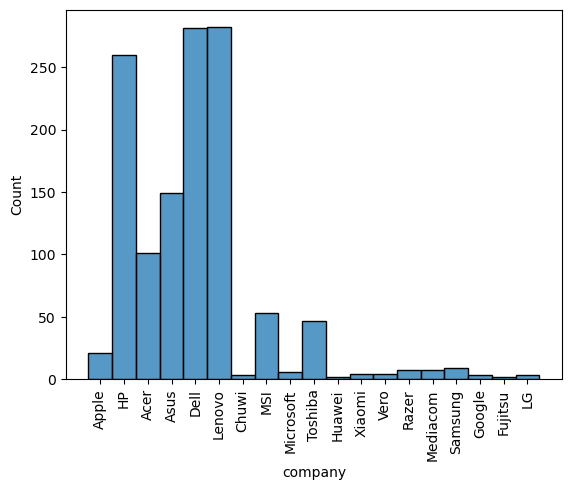

In [160]:
sns.histplot(data = df1, x = 'company')
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: ylabel='count'>

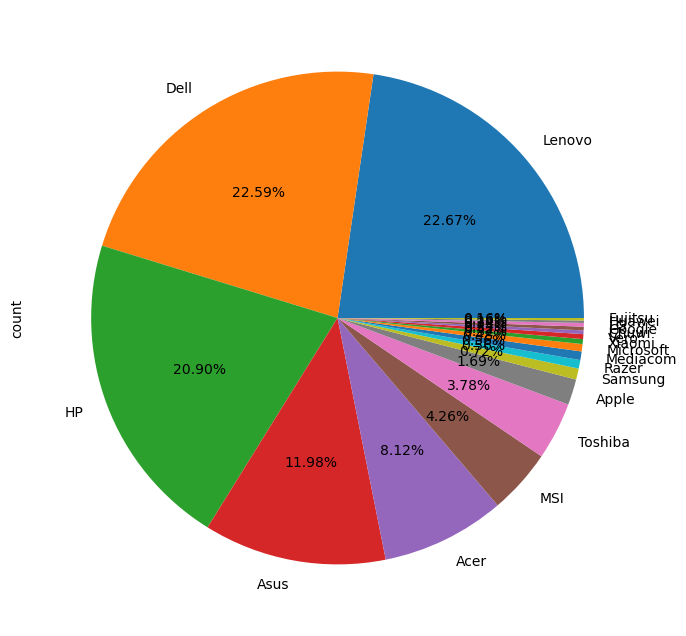

In [161]:
plt.figure(figsize = (8,8))
df1['company'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

<Axes: ylabel='count'>

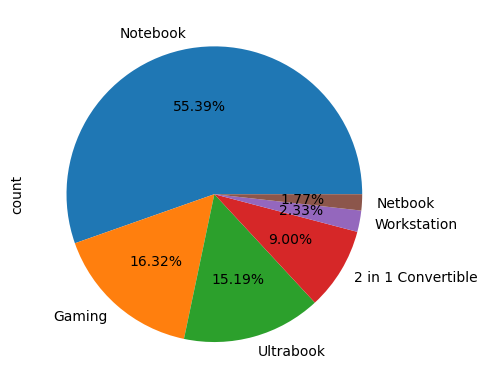

In [162]:
df1['typename'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

In [163]:
df1['screen_size'].isnull().sum()

1

In [164]:
df1[df1['screen_size'].isnull()]

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
465,Dell,Workstation,NaN,8,256GB SSD,Nvidia Quadro M1200,1.78,128298.24,1920,1080,...,Core i7 7700HQ,Nvidia,windows,256.0,NaN,NaN,1,0,True,False


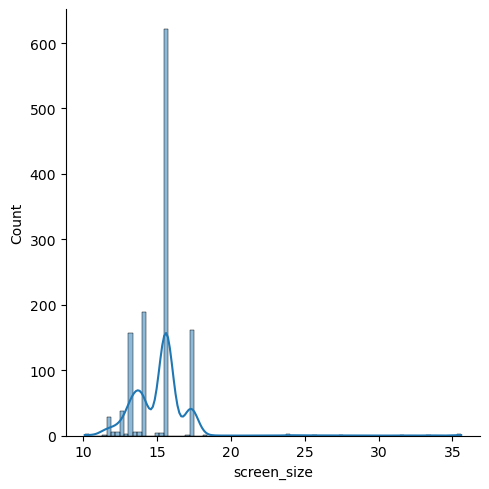

In [165]:
sns.displot(data = df1, x = 'screen_size', kind = 'hist', kde = True)

In [166]:
df1['screen_size'].skew()

4.065606422619032

In [167]:
# data is highly skewed - so using median,
df1.loc[465,'screen_size'] = df1['screen_size'].median()

In [168]:
df1[df1['screen_size'].isnull()]
# fixed.

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present


In [169]:
df1['weight'].skew()

1.1714340420782172

In [170]:
df1['weight'].median()

2.04

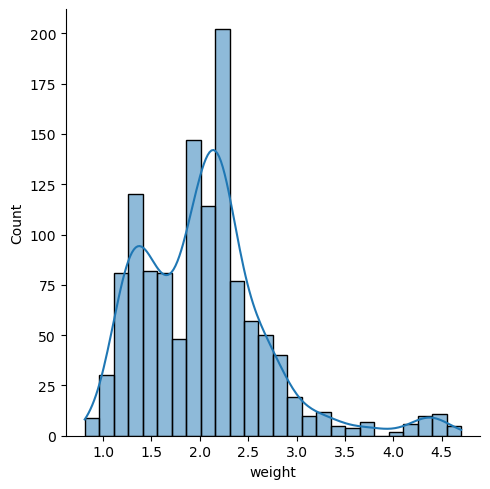

In [171]:
sns.displot(data = df1, x = 'weight', kind = 'hist', kde = True)

In [172]:
df1[df1['weight'].isnull()]

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
128,Acer,Notebook,15.6,4,256GB SSD,Nvidia GeForce MX130,NaN,30476.16,1920,1080,...,Core i3 7130U,Nvidia,windows,256.0,NaN,NaN,1,0,True,False
167,Toshiba,Notebook,15.6,4,500GB HDD,Intel HD Graphics 620,NaN,26053.92,1366,768,...,Core i3 7100U,Intel,windows,NaN,500.0,NaN,0,1,False,True
201,Dell,Ultrabook,13.3,8,256GB SSD,Intel UHD Graphics 620,NaN,77202.72,1920,1080,...,Core i7 8550U,Intel,windows,256.0,NaN,NaN,1,0,True,False
232,Lenovo,Notebook,15.6,8,128GB SSD,Intel HD Graphics 520,NaN,31381.92,1366,768,...,Core i3 6006U,Intel,windows,128.0,NaN,NaN,1,0,True,False
258,Asus,2 in 1 Convertible,13.3,8,512GB SSD + 512GB SSD,Intel UHD Graphics 620,NaN,79866.72,1920,1080,...,Core i7 8550U,Intel,windows,512.0,NaN,NaN,2,0,True,False
293,Lenovo,Notebook,17.3,6,1TB HDD,Nvidia GeForce GTX 940M,NaN,34578.72,1600,900,...,Core i5 7200U,Nvidia,windows,NaN,1024.0,NaN,0,1,False,True
317,Acer,Notebook,15.6,6,1TB HDD,Intel HD Graphics 620,NaN,29250.72,1366,768,...,Core i5 7200U,Intel,windows,NaN,1024.0,NaN,0,1,False,True
339,Dell,Ultrabook,15.6,8,1TB HDD,AMD Radeon 530,NaN,35324.64,1920,1080,...,Core i5 8250U,AMD,windows,NaN,1024.0,NaN,0,1,False,True
445,Dell,Notebook,17.3,8,1TB HDD,Nvidia GeForce GTX 1060,NaN,109010.88,1920,1080,...,Core i7 7700HQ,Nvidia,windows,NaN,1024.0,NaN,0,1,False,True
574,Lenovo,Ultrabook,14.0,12,256GB SSD,Intel HD Graphics 520,NaN,89137.44,1920,1080,...,Core i7 6600U,Intel,windows,256.0,NaN,NaN,1,0,True,False


In [173]:
xys = pd.concat([
df1.groupby('typename')['weight'].mean(),
df1.groupby('typename')['weight'].median()
], axis = 1
)
xys.columns = ['mean_wt', 'median_wt']
xys.index

Index(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'],
      dtype='object', name='typename')

In [174]:
xys

,mean_wt,median_wt
typename,,
2 in 1 Convertible,1.580741,1.42
Gaming,2.952217,2.70
Netbook,1.333182,1.26
Notebook,2.048490,2.10
Ultrabook,1.338649,1.29
Workstation,2.466552,2.31


In [175]:
weight_null_index = df1[df1['weight'].isnull()].index

In [176]:
def null_wt_replacer(var):
    typename_median_wt = {
        '2 in 1 Convertible': 1.42,
        'Gaming': 1.42,
        'Netbook': 1.26,
        'Notebook': 2.10,
        'Ultrabook': 1.29,
        'Workstation': 2.31
    }
    if var['typename'] in typename_median_wt:
        var['weight'] = typename_median_wt[var['typename']]
    return var
df1.loc[weight_null_index] = df1.loc[weight_null_index].apply(null_wt_replacer, axis = 1)

C:\conda_temp\ipykernel_26380\2954527006.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 4  4  8  8  8  6  6  8  8 12 16  8  4  4  4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.loc[weight_null_index] = df1.loc[weight_null_index].apply(null_wt_replacer, axis = 1)


In [177]:
df1['weight'].isnull().sum()

0

In [178]:
temp_ssd_fill = df1['ssd_capacity'].fillna(0)
type(temp_ssd_fill)

C:\conda_temp\ipykernel_26380\191038192.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_ssd_fill = df1['ssd_capacity'].fillna(0)


pandas.core.series.Series

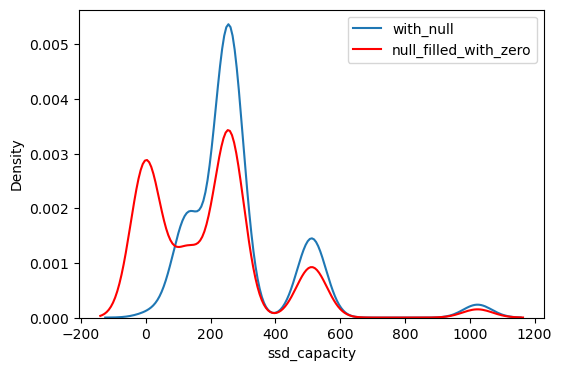

In [179]:
fig= plt.figure(figsize = (6,4))
ax1 = fig.add_subplot(1,1,1)
sns.kdeplot(x = 'ssd_capacity', data = df1, ax = ax1, label = 'with_null')
sns.kdeplot(data = temp_ssd_fill,ax = ax1, color = 'red', label = 'null_filled_with_zero')
plt.legend()
# sns.kdeplot(data = temp_ssd_fill,ax = ax2, color = 'red', label = 'null_filled_with_zero')


In [180]:
df1['ssd_capacity'].unique()
# these lower values are - values of ssd for (2000 - 2010) model of laptops - so valid.
# removing them might skew the results for price prediction

array([128.0, 256.0, 512.0, nan, 32.0, 64.0, 1024.0, 16.0, 180.0, 240.0,
       8.0, 508.0], dtype=object)

In [181]:
df1[['ssd_capacity','price']].corr() # high correlation

,ssd_capacity,price
ssd_capacity,1.000000,0.469801
price,0.469801,1.000000


In [182]:
df1['ssd_capacity'] = df1['ssd_capacity'].fillna(0)

C:\conda_temp\ipykernel_26380\2095858386.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['ssd_capacity'] = df1['ssd_capacity'].fillna(0)


In [183]:
df1[df1['ssd_capacity'] == 508]
df1.loc[951,'ssd_capacity'] = 512

In [184]:
df1['hdd_capacity'].unique()

array([nan, 500.0, 1024.0, 2048.0, 32.0, 128.0], dtype=object)

In [185]:
df1[['hdd_capacity','price']].corr() # slight correlation

,hdd_capacity,price
hdd_capacity,1.000000,0.202357
price,0.202357,1.000000


In [186]:
df1['hdd_capacity'] = df1['hdd_capacity'].fillna(0)

C:\conda_temp\ipykernel_26380\3680392831.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['hdd_capacity'] = df1['hdd_capacity'].fillna(0)


In [187]:
df1['flash_not_storage'].isnull().sum()/df1.shape[0] 

0.9541800643086816

In [188]:
# 95 % values are missing
# but whereever its present - the values of ssd and hdd are zero.

In [189]:
df1[~df1['flash_not_storage'].isnull()]

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,flash_not_storage,ssd_count,hdd_count,ssd_present,hdd_present
29,Chuwi,Notebook,15.6,4,64GB Flash Storage,Intel HD Graphics,1.89,13053.07,1920,1080,...,Atom x5-Z8300,Intel,windows,0.0,0.0,64.0,0,0,False,False
30,Asus,Notebook,14.0,2,32GB Flash Storage,AMD Radeon R2,1.65,10602.72,1366,768,...,E-Series E2-6110,AMD,windows,0.0,0.0,32.0,0,0,False,False
34,Lenovo,Notebook,14.0,4,64GB Flash Storage,Intel HD Graphics 500,1.44,13266.72,1366,768,...,Celeron Dual Core N3350,Intel,windows,0.0,0.0,64.0,0,0,False,False
184,Vero,Notebook,14.0,4,32GB Flash Storage,Intel HD Graphics 500,1.30,13852.80,1920,1080,...,Celeron Dual Core N3350,Intel,windows,0.0,0.0,32.0,0,0,False,False
305,Asus,2 in 1 Convertible,11.6,2,32GB Flash Storage,Intel HD Graphics 500,1.10,14652.00,1366,768,...,Celeron Dual Core N3350,Intel,windows,0.0,0.0,32.0,0,0,False,False
308,Lenovo,Notebook,13.3,4,16GB Flash Storage,Intel HD Graphics 510,1.45,24503.47,1366,768,...,Celeron Dual Core 3855U,Intel,chrome_os,0.0,0.0,16.0,0,0,False,False
310,Acer,Notebook,11.6,4,128GB Flash Storage,Intel HD Graphics 405,1.40,25840.80,1366,768,...,Pentium Quad Core N3710,Intel,windows,0.0,0.0,128.0,0,0,False,False
316,Lenovo,Notebook,14.0,4,32GB Flash Storage,Intel HD Graphics 500,1.44,15557.76,1366,768,...,Celeron Dual Core N3350,Intel,windows,0.0,0.0,32.0,0,0,False,False
336,HP,Notebook,14.0,2,32GB Flash Storage,Intel HD Graphics 400,1.44,14865.12,1366,768,...,Celeron Dual Core N3060,Intel,windows,0.0,0.0,32.0,0,0,False,False
338,Asus,2 in 1 Convertible,11.6,4,32GB Flash Storage,Intel HD Graphics 500,1.50,19980.00,1366,768,...,Celeron Dual Core N3350,Intel,windows,0.0,0.0,32.0,0,0,False,False


In [190]:
index_to_swap = df1[~df1['flash_not_storage'].isnull()].index # just shift them to ssd and drop the column.

In [191]:
df1.loc[index_to_swap,'ssd_capacity'] = df1.loc[index_to_swap,'flash_not_storage']
df1.loc[index_to_swap,'flash_not_storage'] = np.NaN

In [192]:
df1 = df1.drop(columns = 'flash_not_storage')

In [193]:
df1['total_storage'] = df1['ssd_capacity'] + df1['hdd_capacity']

In [194]:
df1[['price', 'total_storage']].corr()

,price,total_storage
price,1.000000,0.156193
total_storage,0.156193,1.000000


In [195]:
df1[df1['total_storage'] == 0]

,company,typename,screen_size,ram,memory,gpu,weight,price,px_h,px_v,...,processor_details,gpu_brand,os_used,ssd_capacity,hdd_capacity,ssd_count,hdd_count,ssd_present,hdd_present,total_storage
749,Dell,Notebook,15.6,16,?,AMD Radeon R7 M445,2.3,62938.07,1920,1080,...,Core i7 7500U,AMD,windows,0.0,0.0,0,0,False,False,0.0


In [196]:
df1.isnull().sum()

company              0
typename             0
screen_size          0
ram                  0
memory               0
gpu                  0
weight               0
price                0
px_h                 0
px_v                 0
screen_info          0
processor_brand      0
processor_freq       0
processor_details    0
gpu_brand            0
os_used              0
ssd_capacity         0
hdd_capacity         0
ssd_count            0
hdd_count            0
ssd_present          0
hdd_present          0
total_storage        0
dtype: int64